In [129]:
import pandas as pd
import numpy as np
import os
import json
# import dt
import re

# GM_RESULT

In [130]:
res = pd.read_csv("game_results.csv")
res.head()


,game_id,seed_game_id,players,generations,game_options,scores,createtime
0,f7cbeb6cc687,NaN,4,8,NaN,"[{""corporation"":""Poseidon"",""playerScore"":69,""p...",31/8/2020 15:05:21
1,10d3f58364b6,NaN,2,12,NaN,"[{""corporation"":""Aridor"",""playerScore"":144,""pl...",31/8/2020 15:05:21
2,ff2c9f3f3e45,NaN,4,8,NaN,"[{""corporation"":""Inventrix (breakthrough)"",""pl...",31/8/2020 15:05:21
3,cf45c3f6faa2,NaN,2,11,NaN,"[{""corporation"":""Arklight (breakthrough)"",""pla...",31/8/2020 15:05:21
4,79cef4b6a297,NaN,2,8,NaN,"[{""corporation"":""Point Luna"",""playerScore"":60,...",31/8/2020 15:05:21


In [131]:
# preprocessing
res["scores"] = res["scores"].astype(object)
res["game_options"] = res["game_options"].astype(object)
res["createtime"] = pd.to_datetime(res["createtime"], dayfirst=True)
res.tail()


,game_id,seed_game_id,players,generations,game_options,scores,createtime
8050,ga76c9f0c854c,NaN,4,7,"{""boardName"":""tharsis"",""undoOption"":true,""show...","[{""corporation"":""Pobolog (breakthrough)"",""corp...",2021-08-05 22:21:28
8051,g832eace87710,NaN,3,8,"{""boardName"":""elysium"",""undoOption"":true,""show...","[{""corporation"":""Valley Trust"",""corporation2"":...",2021-08-05 23:05:02
8052,g1c726aff5ed2,NaN,4,7,"{""boardName"":""elysium"",""undoOption"":true,""show...","[{""corporation"":""Manutech"",""corporation2"":"""",""...",2021-08-06 00:42:32
8053,g9741ef1401ae,NaN,4,8,"{""boardName"":""elysium"",""undoOption"":true,""show...","[{""corporation"":""Viron (breakthrough)"",""corpor...",2021-08-06 00:50:50
8054,ge083c9326a6c,NaN,2,10,"{""boardName"":""hellas"",""undoOption"":true,""showT...","[{""corporation"":""Ecoline (breakthrough)"",""corp...",2021-08-06 05:58:31


In [132]:
# scores proprocessing
store = []
for i in res["scores"]:
    tmp = json.loads(i)
    for i in range(len(tmp)):
        tmp[i]['order'] = i+1
    tmp = sorted(tmp,key = lambda e:e.__getitem__('playerScore'),reverse = True) # can optimize to obtain knowledge of order
    for i in range(len(tmp)):
        tmp[i]['position'] = i+1
    store.append(tmp)
df1 = pd.DataFrame(store)
df1.columns = ["player1","player2","player3","player4","player5","player6"]

In [133]:
options = []
for i in res["game_options"]:
    if not pd.isna(i):
        options.append(json.loads(i))
    else: options.append({})
df2 = pd.DataFrame(options)
df2.head()

,draftVariant,corporateEra,preludeExtension,venusNextExtension,coloniesExtension,turmoilExtension,boardName,showOtherPlayersVP,customCorporationsList,customColoniesList,...,showTimers,politicalAgendasExtension,moonExpansion,requiresMoonTrackCompletion,erosCardsOption,politicalAgendasExtensionToggle,showCardsBlackList,showColoniesList,randomMAToggle,doubleCorp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df2.head()

,draftVariant,corporateEra,preludeExtension,venusNextExtension,coloniesExtension,turmoilExtension,boardName,showOtherPlayersVP,customCorporationsList,customColoniesList,...,showTimers,politicalAgendasExtension,moonExpansion,requiresMoonTrackCompletion,erosCardsOption,politicalAgendasExtensionToggle,showCardsBlackList,showColoniesList,randomMAToggle,doubleCorp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df3 = pd.concat([res, df1, df2],axis=1)
df4= df3.drop(columns=['seed_game_id','game_options','scores','draftVariant','corporateEra','solarPhaseOption','undoOption','fastModeOption','includeVenusMA','soloTR','removeNegativeGlobalEventsOption','politicalAgendasExtension','requiresMoonTrackCompletion','showTimers','politicalAgendasExtensionToggle','aresHazards','requiresVenusTrackCompletion','politicalAgendasExtensionToggle','solarPhaseOption'])
df4.head(5)

,game_id,players,generations,createtime,player1,player2,player3,player4,player5,player6,...,initialDraftRounds,cardsBlackList,communityCardsOption,aresExtension,moonExpansion,erosCardsOption,showCardsBlackList,showColoniesList,randomMAToggle,doubleCorp
0,f7cbeb6cc687,4,8,2020-08-31 15:05:21,"{'corporation': 'Septem Tribus', 'playerScore'...","{'corporation': 'Valley Trust (breakthrough)',...","{'corporation': 'Teractor (breakthrough)', 'pl...","{'corporation': 'Poseidon', 'playerScore': 69,...",None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10d3f58364b6,2,12,2020-08-31 15:05:21,"{'corporation': 'Aridor', 'playerScore': 144, ...","{'corporation': 'Inventrix (breakthrough)', 'p...",None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ff2c9f3f3e45,4,8,2020-08-31 15:05:21,"{'corporation': 'Thorgate (breakthrough)', 'pl...","{'corporation': 'Teractor (breakthrough)', 'pl...","{'corporation': 'Inventrix (breakthrough)', 'p...","{'corporation': 'Mining guild (breakthrough)',...",None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cf45c3f6faa2,2,11,2020-08-31 15:05:21,"{'corporation': 'Factorum (breakthrough)', 'pl...","{'corporation': 'Arklight (breakthrough)', 'pl...",None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79cef4b6a297,2,8,2020-08-31 15:05:21,"{'corporation': 'Point Luna', 'playerScore': 6...","{'corporation': 'Celestic', 'playerScore': 43,...",None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df4.columns
df4.to_csv('./prprocessing_data', index = False)

In [137]:
def getPlayer(df,num):
    player_df = pd.DataFrame(columns=['player','count'])
    for index,i in df.iterrows():
        if i['players'] == num: #start
            for column in ['player1','player2','player3','player4']:
                player_df.loc[player_df.shape[0]] = [i[column]['player'].lower().strip(),1]
    ff1 = player_df.groupby(player_df["player"]).count()
    ff1["player_list"] = ff1.index.values.tolist()
    return ff1


In [138]:
player_count = getPlayer(df4,4)
player_count.to_csv('./pl_count.csv', index = True)

In [139]:
def playerCount(df,num,player): #TODO,模糊查找
    player_df = pd.DataFrame(columns=['id','corporation1', 'rank', 'order','score', 'time', 'generations','corporation2'])
    for index,i in df.iterrows():
        if i['players'] == num: #start
            for column in ['player1','player2','player3','player4']:
                if i[column]['player'].lower() in [p.lower() for p in player] and ('corporation2' not in i[column].keys()):
                    player_df.loc[player_df.shape[0]] = [i[column]['player'].lower(),i[column]['corporation'],i[column]['position'],i[column]['order'],i[column]['playerScore'],i['createtime'],i['generations'],'nan']
                elif i[column]['player'].lower() in [p.lower() for p in player] and ('corporation2' in i[column].keys()):
                    player_df.loc[player_df.shape[0]] = [i[column]['player'].lower(),i[column]['corporation'],i[column]['position'],i[column]['order'],i[column]['playerScore'],i['createtime'],i['generations'],i[column]['corporation2']]
    return player_df

In [140]:
df_player = playerCount(df4,4,['ee'])
df_player.tail(20)

,id,corporation1,rank,order,score,time,generations,corporation2
0,ee,Aphrodite (breakthrough),2,1,82,2021-04-26 16:26:26,7,nan
1,ee,Manutech,1,1,74,2021-04-27 17:34:43,7,nan
2,ee,Inventrix (breakthrough),4,2,76,2021-04-28 01:41:52,8,nan
3,ee,Terralabs Research (breakthrough),1,1,85,2021-04-28 17:40:15,8,nan
4,ee,Philares,1,1,65,2021-04-29 01:01:53,5,nan
5,ee,Teractor (breakthrough),1,3,76,2021-04-30 01:36:51,7,nan
6,ee,Pharmacy Union,1,3,102,2021-05-20 00:42:47,7,nan
7,ee,Lakefront Resorts,2,2,66,2021-06-20 00:12:36,6,Mining guild (breakthrough)
8,ee,Philares,1,4,80,2021-07-03 14:13:03,6,Ecoline (breakthrough)
9,ee,Point Luna,1,3,87,2021-07-09 20:50:31,6,Teractor (breakthrough)


In [141]:
#time series
def time_series(df):
    ff1 = df[(df["players"]==4) & (df["generations"]<=9)]
    ff1.to_csv('./time_original', index = True)
    ff2 = ff1.groupby(ff1['createtime'].dt.date).mean()
    return ff2


<AxesSubplot:xlabel='createtime'>

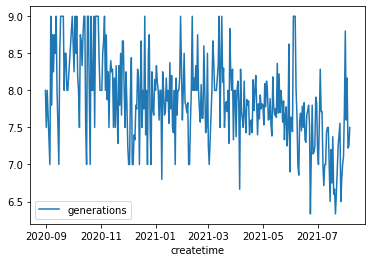

In [142]:
# 时间绘图
df5 = time_series(df4)
df5.head(20)
df5 = df5.drop(columns=["players","initialDraftRounds"])
df5.to_csv('./time_series.csv', index = True)
df5.plot()

# US_RESULT

In [152]:
# usage: demostrate user's creating time, like "you are the NO.1132 player"
user = pd.read_csv("users.csv")
user = user.drop(columns="prop")
user["name"] = user["name"].str.lower()
user["createtime"] = pd.to_datetime(user["createtime"], dayfirst=True)
user = user.sort_values(by=["createtime"])
user = user.reset_index(drop=True)
user["createtime"] = user.index+1
user.to_csv('./user_pre.csv', index = False)

In [156]:
# left join and mapping
user_player = user.merge(player_count,how="left",left_on="name",right_on="player")
user_player = user_player.sort_values(by=["player_list"],na_position="first")
user_player.to_csv('./user_player_mapping.csv', index = False)
user_player.head()

,name,createtime,count,player_list
5,angel,6,NaN,NaN
11,bolong,12,NaN,NaN
12,传说中的肥羊,13,NaN,NaN
21,aptx4968_,22,NaN,NaN
22,noswordknight,23,NaN,NaN


In [161]:
# detect missing user name
player_user = player_count.merge(user,how="left",left_on="player",right_on="name")
player_user = player_user.sort_values(by=["count"],ascending=False, na_position="first")
player_user = player_user[player_user["name"].isna()]
player_user.to_csv('./player_user_mapping.csv', index = False)
player_user.head()

,count,player_list,name,createtime
